In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv("../Data/Mall_Customers.csv",index_col="CustomerID")

In [5]:
df

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [6]:
df.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [68]:
df.describe()

,Genre,Age,Annual_Income_(k$),Spending_Score,Final Label
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000,2.180000
std,0.497633,13.969007,26.264721,25.823522,1.587514
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,1.000000
50%,0.000000,36.000000,61.500000,50.000000,2.000000
75%,1.000000,49.000000,78.000000,73.000000,3.000000
max,1.000000,70.000000,137.000000,99.000000,5.000000


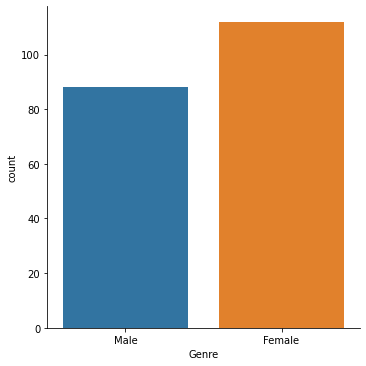

In [7]:
sns.catplot(data=df,x="Genre",kind="count")

In [8]:
df["Genre"]=df["Genre"].map({"Male":1,"Female":0})

In [9]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

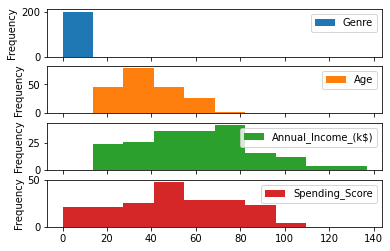

In [14]:
df.plot(kind="hist",subplots=True)

In [15]:
X=df

### Elbow Method

##### Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 10 using for loop and calculated the values of inertia for each value of k.

In [17]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Inertia')

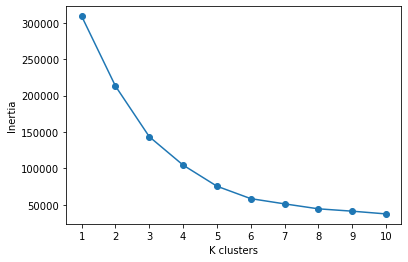

In [19]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 6.

In [20]:
model=KMeans(n_clusters=6)
model.fit(X)

KMeans(n_clusters=6)

In [22]:
model.labels_

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 0,
       4, 5, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [23]:
model.n_iter_

3

In [24]:
model.cluster_centers_

array([[ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [26]:
data=df
data["Final Label"]=model.labels_
data

,Genre,Age,Annual_Income_(k$),Spending_Score,Final Label
CustomerID,,,,,
1,1,19,15,39,4
2,1,21,15,81,5
3,0,20,16,6,4
4,0,23,16,77,5
5,0,31,17,40,4
...,...,...,...,...,...
196,0,35,120,79,3
197,0,45,126,28,1
198,1,32,126,74,3


### Selecting only two features for model for visualization of Clusters
Annual_Income_(k$) and Spending_Score are two important Features

In [27]:
X=df[["Annual_Income_(k$)","Spending_Score"]]

In [28]:
X.head()

,Annual_Income_(k$),Spending_Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


### Elbow method to get optimal number of k on new data

In [29]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Inertia')

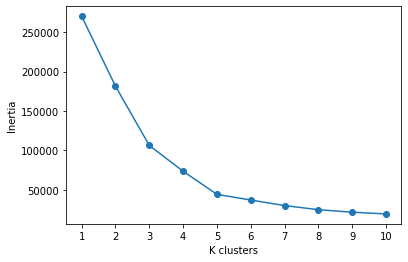

In [30]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [61]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [62]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [63]:
model.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [64]:
model.n_iter_

8

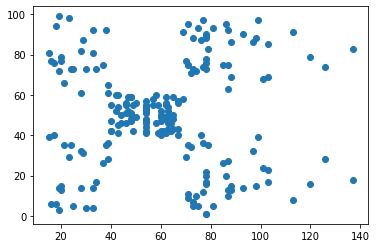

In [65]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"])

In [66]:
centroid=model.cluster_centers_
#just for checking centroid values
for i in range(centroid.shape[0]):
    print(centroid[i])
centroid.shape

[88.2        17.11428571]
[25.72727273 79.36363636]
[86.53846154 82.12820513]
[26.30434783 20.91304348]
[55.2962963  49.51851852]


(5, 2)

### Cluster Visualization

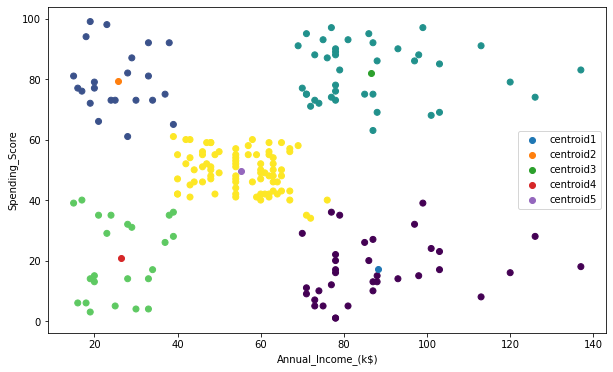

In [67]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"],c=model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.legend()